In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metodos_interpolacao import lagrange, norma_max, linear_partes

Função a ser interpolada: $$f(x)=\dfrac{1}{1+25x^2}$$

In [2]:
def f(x):
    return np.float64(1 / (1+25*x**2))

In [3]:
A = -1
B = 1
z = np.arange(A,B+0.02,0.01)
y = [f(xi) for xi in z]

Gráfico da curva que será interpolada: 

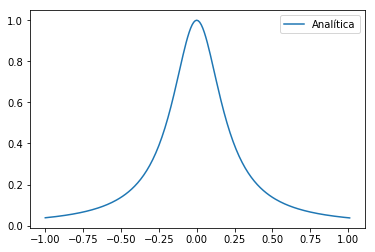

In [4]:
plt.plot(z,y, label='Analítica')
plt.legend()
plt.show()

Utilizando pontos no formato: $$x_k = a + \dfrac{b-a}{n}k, \quad k = 0,1,2,...,n$$

In [5]:
def pontoA(A,B,k,n):
    x = np.float64(A + (B-A)*k/n)
    return x

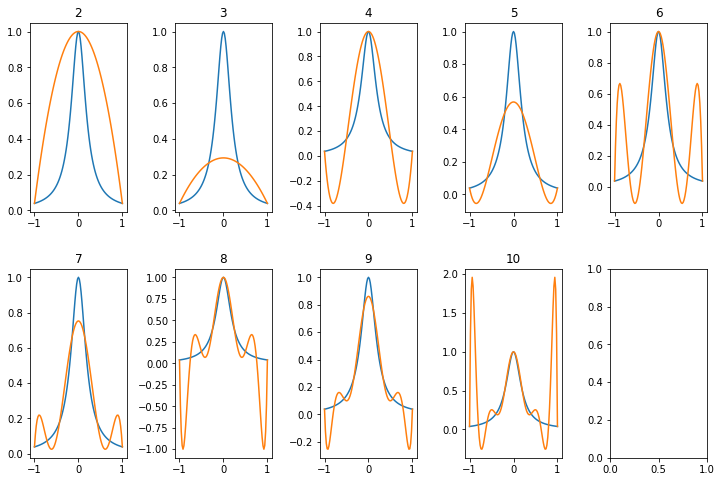

In [6]:
n = list(range(2,11))

fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(10, 8))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)
c = 0
l = 0
for ni in n:
    # Analitica
    z = np.arange(A,B+0.02,0.02)
    y = [f(xi) for xi in z]
    axarr[l, c].plot(z,y)
    
    # Estimada
    x = [pontoA(A,B,k,ni) for k in range(ni+1)]
    x.sort()
    y = [f(xi) for xi in x]
        
    interpol = lagrange(len(x),x,y,z)
    
    axarr[l, c].plot(z,interpol, label=str(ni))
    axarr[l, c].set_title(str(ni))
    
    c+=1
    if (c >= 5):
        c = 0
        l += 1

        
plt.show()
# plt.savefig('lagrangeA.png', bbox_inches='tight')

Utilizando pontos no formato: $$x_k = \dfrac{a+b}{2} - \dfrac{b-a}{2}\cos\left(\dfrac{k}{n}\pi \right), \quad k = 0,1,2,...,n.$$

In [7]:
def pontoB(A,B,k,n):
    PI = np.pi
    x = np.float64((A+B)/2 - ((B-A)/2)*np.cos(k*PI/n))
    return x

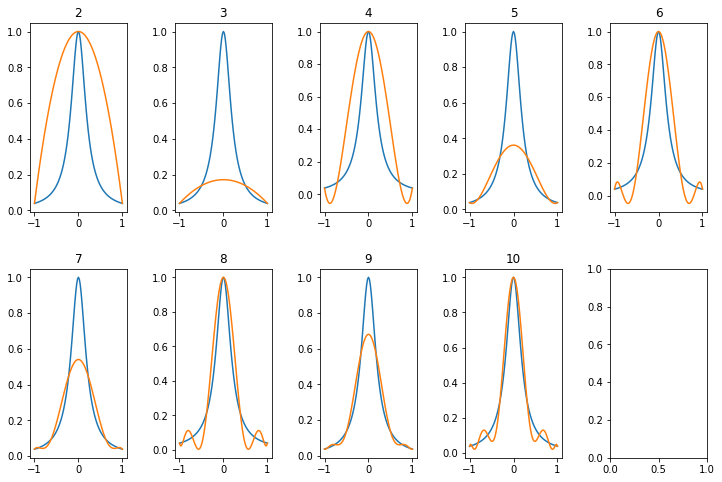

In [8]:
n = list(range(2,11))

fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(10, 8))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)

c = 0
l = 0
for ni in n:
    # Analitica
    z = np.arange(A,B+0.02,0.02)
    y = [f(xi) for xi in z]
    axarr[l, c].plot(z,y)
    
    # Estimada
    x = [pontoB(A,B,k,ni) for k in range(ni+1)]
    x.sort()
    y = [f(xi) for xi in x]
    
    interpol = lagrange(len(x),x,y,z)
    
    axarr[l, c].plot(z,interpol, label=str(ni))
    axarr[l, c].set_title(str(ni))
    
    c+=1
    if (c >= 5):
        c = 0
        l +=1

plt.show()
# plt.savefig('lagrangeB.png', bbox_inches='tight')

Utilizando pontos no formato: $$x_k = -1 + \dfrac{2}{n}k, \quad k = 0,1,2,...,n.$$

In [9]:
def pontoC(k,n):
    x = np.float64(-1 + (2/n)*k)
    return x

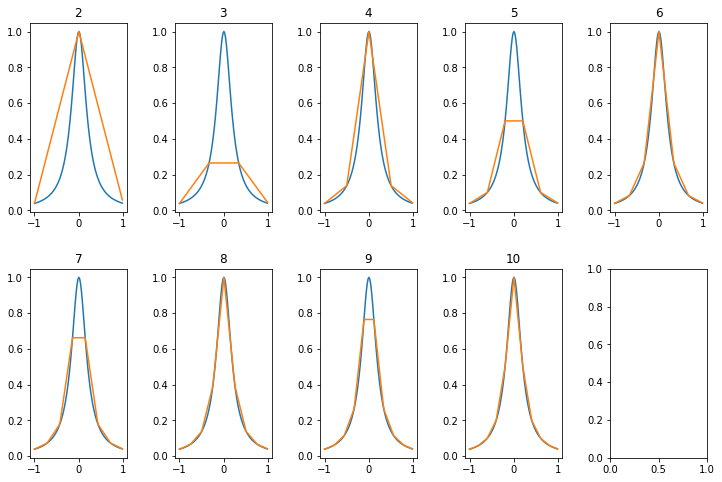

In [10]:
n = list(range(2,11))

fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(10, 8))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)

c = 0
l = 0
for ni in n:
    # Analitica
    z = np.arange(A,B,0.02)
    y = [f(xi) for xi in z]
    axarr[l, c].plot(z,y)
    
    # Estimada
    x = np.array([pontoC(k,ni) for k in range(ni+1)])
    x.sort()
    y = [f(xi) for xi in x]
    
    interpol = linear_partes(len(x),x,y,z)
    
    axarr[l, c].plot(z,interpol, label=str(ni))
    axarr[l, c].set_title(str(ni))
    
    c+=1
    if (c >= 5):
        c = 0
        l += 1
plt.show()
# plt.savefig('lagrangeC.png', bbox_inches='tight')

Comparação entre os demais resultados:

In [11]:
n = [2,5,10]
erroA = []
erroB = []
erroC = []

for ni in n:
    
    z = np.arange(A,B,0.02)
    
    # Pontos do primeiro exercício
    x = [pontoA(A,B,k,ni) for k in range(ni+1)]
    y = [f(xi) for xi in x]
    
    interpol = lagrange(len(x),x,y,z)
    analitico = [f(xi) for xi in z]
    
    erroA.append(norma_max(analitico,interpol))
    z = np.arange(A,B,0.02)
    
    # Pontos do segundo exercício 
    x = [pontoB(A,B,k,ni) for k in range(ni+1)]
    y = [f(xi) for xi in x]
    
    interpol = lagrange(len(x),x,y,z)
    analitico = [f(xi) for xi in z]
    
    erroB.append(norma_max(analitico,interpol))
    z = np.arange(A,B,0.02)
    
    # Pontos do terceiro exercício
    x = [pontoC(k,ni) for k in range(ni+1)]
    x.sort()
    y = [f(xi) for xi in x]
    
    interpol = linear_partes(len(x),x,y,z)
    analitico = [f(xi) for xi in z]
    
    erroC.append(norma_max(analitico,interpol))

In [12]:
indices = ['2','5', '10']
colunas = ['A', 'B', 'C']

df = pd.DataFrame([erroA, erroB, erroC]).T
df.columns = colunas
df.index = indices

Valores de erro pela norma do máximo para cada conjunto de pontos:

In [13]:
df

,A,B,C
2,0.646154,0.646154,0.417997
5,0.432692,0.638641,0.500000
10,1.915643,0.131883,0.067431


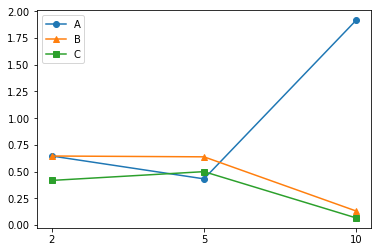

In [14]:
plt.plot(df.index,df['A'], label='A', marker='o')
plt.plot(df.index,df['B'], label='B', marker='^')
plt.plot(df.index,df['C'], label='C', marker='s')

plt.legend()
plt.show()
# plt.savefig('erro.png', bbox_inches='tight')